In [241]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

In [48]:
df = pd.read_csv('scored_corpus.csv')

In [49]:
qid = 'int-1'
temp_df = df.sort_values(by=[qid], ascending=False)[0:100]
l = []
for index, row in temp_df.iterrows():
    l.append(row['id'])

In [230]:
i = l[100]
print(df.iloc[i,0])
df.at[i, qid] = 1

IndexError: list index out of range

In [239]:
l = df.sort_values(by=[qid], ascending=False)[0:100]['int-1'].tolist()

Counter({5.0: 1, 4.0: 3, 3.0: 6, 2.0: 6, 1.0: 28, 0.0: 56})

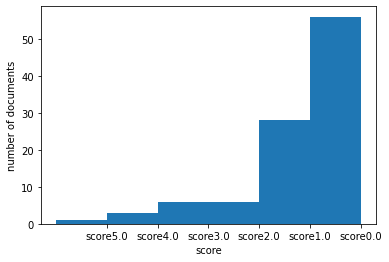

In [248]:
l_str = []
for e in l:
    string = 'score' + str(e)
    l_str.append(string)
labels, values = zip(*Counter(l_str).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('score')
plt.ylabel('number of documents')
plt.savefig('query1_distribution.jpg')

In [251]:
df.to_csv('scored_corpus_by_hand.csv', index=False)